# L1 - Lista de Exercícios 1

__Objetivo:__ Desenvolver e revisar os conteúdos desenvolvidos até então no modulo;

__Conteúdo:__ Serão 2 Exercícios obrigatórios (8 pontos) e um extra opcional (2 pontos), totalizando 10 pontos;

__Forma de Entrega:__ _Jupyter Notebook_ individualmente pelo _Class_;

__Data Limite para entrega:__ até o dia 05/08/2022;

__Obs:__ O tempo de aula hoje será exclusivamente para o desenvolvimento dos exercícios e monitoria de dúvidas sobre os exercícios.

<br>

__E1__ Utilizando o _dataset_ `sports` disponibilizado no _drive_, desenvolva os tópicos a seguir:

- Limpeza e tratamento dos dados;
- Análise Exploratória dos Dados;
- Identificação do Modelo de _Machine Learning_ mais adequado para a aplicação (Regressão ou classificação);
- Execução do modelo escolhido e levantamento das métricas;

<br>

__E2__ Utilizando ao _dataset_ `insurance.csv`disponibilizado no _drive_, desenvolva os tópicos a seguir:

- Limpeza e tratamento dos dados;
- Análise Exploratória dos Dados;
- Utilize um modelo de Regressão Linear para chegar nos valores de seguros cobrados;
- Utilize agora um modelo de Regressão Logística para fazer a classificação das classes de seguros;

__DICA:__ As classes de seguros precisam ser criadas (não existe no _dataset_). Desenvolva a _target_ explorando a relação entre os valores cobrados pela idade dos segurados. 

<br>

__EE__ Dando continuidade ao exercício desenvolvido sobre o _dataset_ `COVID`, ou seja, após a limpeza dos dados e análise exploratória dos dados (isso não precisa ter nesse exercício, só a base já tratada). Desenvolva os tópicos a seguir:

 - Utilize uma Regressão Logística para as predições de resultados positivos de COVID;
 - A partir do _F1-Score_, determine o valor ideal de limiar de corte (_threshold_) para que se minimize os Falsos Negativos.
 
 <br>

**E1**) Utilizando o dataset sports disponibilizado no drive, desenvolva os tópicos a seguir:
- Limpeza e tratamento dos dados;
- Análise Exploratória dos Dados;
- Identificação do Modelo de Machine Learning mais adequado para a aplicação (Regressão ou classificação);
- Execução do modelo escolhido e levantamento das métricas;

---

### Importando as bases de dados

In [20]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import os
from pathlib import Path
from IPython import display

print("***** Bibliotecas importadas com sucesso *****")

***** Bibliotecas importadas com sucesso *****


In [21]:
def caminho_dos_dados(projeto):
    '''    Função que retorna o caminho dos dados atual acrescido do nome do projeto
    '''
    return str(Path(os.getcwd()).parent) + projeto


In [24]:
#Importando a base Sports e dando uma olhada no formato dos dados

projeto = '/data'
arquivo = '/sports.csv'
path = caminho_dos_dados(projeto)
sports = pd.read_csv(path + arquivo)

sports.shape
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1329 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

In [29]:
sports.shape[0]

1340

In [42]:
sports.columns

Index(['Name', 'GamesPlayed', 'MinutesPlayed', 'PointsPerGame',
       'FieldGoalsMade', 'FieldGoalsAttempt', 'FieldGoalPercent', '3PointMade',
       '3PointAttempt', '3PointPercent', 'FreeThrowMade', 'FreeThrowAttempt',
       'FreeThrowPercent', 'OffensiveRebounds', 'DefensiveRebounds',
       'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Target'],
      dtype='object')

In [46]:
sports.corr(method='spearman')

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
GamesPlayed,1.000000,0.641614,0.629725,0.631100,0.598670,0.308058,0.032332,0.042182,0.043060,0.581210,0.564184,0.180348,0.422184,0.528180,0.517879,0.440735,0.516115,0.309300,0.592611,0.396913
MinutesPlayed,0.641614,1.000000,0.924537,0.914580,0.916515,0.243878,0.283859,0.289591,0.185437,0.792769,0.772808,0.237766,0.546941,0.786160,0.741049,0.651513,0.782704,0.429643,0.810359,0.317360
PointsPerGame,0.629725,0.924537,1.000000,0.990493,0.975944,0.327052,0.261200,0.277965,0.192032,0.869787,0.841688,0.287923,0.546135,0.710901,0.690196,0.598397,0.716611,0.386526,0.816155,0.344736
FieldGoalsMade,0.631100,0.914580,0.990493,1.000000,0.974310,0.369671,0.214921,0.233971,0.153436,0.822084,0.801266,0.247911,0.570647,0.717838,0.703588,0.577312,0.700475,0.401000,0.799667,0.344800
FieldGoalsAttempt,0.598670,0.916515,0.975944,0.974310,1.000000,0.172703,0.330899,0.362281,0.240329,0.796757,0.760969,0.303490,0.472074,0.659713,0.628004,0.645799,0.726176,0.324777,0.816277,0.307072
FieldGoalPercent,0.308058,0.243878,0.327052,0.369671,0.172703,1.000000,-0.460159,-0.507575,-0.346993,0.318805,0.371680,-0.166199,0.586094,0.450000,0.521851,-0.141469,0.083808,0.452345,0.148172,0.239037
3PointMade,0.032332,0.283859,0.261200,0.214921,0.330899,-0.460159,1.000000,0.939316,0.791494,0.062495,-0.015285,0.382397,-0.358219,-0.042050,-0.154077,0.434073,0.306695,-0.246789,0.187680,-0.031888
3PointAttempt,0.042182,0.289591,0.277965,0.233971,0.362281,-0.507575,0.939316,1.000000,0.773196,0.085591,0.000864,0.418769,-0.385060,-0.082810,-0.191671,0.501336,0.360028,-0.296974,0.220878,-0.038425
3PointPercent,0.043060,0.185437,0.192032,0.153436,0.240329,-0.346993,0.791494,0.773196,1.000000,0.030273,-0.040202,0.361810,-0.326176,-0.101358,-0.186489,0.355387,0.232375,-0.247873,0.120998,0.003821
FreeThrowMade,0.581210,0.792769,0.869787,0.822084,0.796757,0.318805,0.062495,0.085591,0.030273,1.000000,0.975564,0.283016,0.556336,0.642832,0.645911,0.504383,0.630523,0.380440,0.779354,0.341028


In [45]:
sports.corr()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
GamesPlayed,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.038209,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833
MinutesPlayed,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.165997,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805
PointsPerGame,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.151072,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981
FieldGoalsMade,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.119493,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594
FieldGoalsAttempt,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.197160,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660
FieldGoalPercent,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.330690,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134
3PointMade,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.589855,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619
3PointAttempt,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.582337,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110
3PointPercent,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277,-0.003411
FreeThrowMade,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.030320,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841


In [40]:
sports.groupby('Name').sum()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
Name,,,,,,,,,,,,,,,,,,,,
A.C. Green,82,18.8,6.4,2.5,4.7,53.9,0.0,0.1,16.7,1.2,2.0,61.1,2.0,2.7,4.6,0.7,0.6,0.6,1.2,1
A.J. English,70,20.6,8.8,3.6,8.2,43.9,0.0,0.4,9.7,1.6,2.2,70.7,0.9,1.2,2.1,2.5,0.4,0.2,1.6,0
A.J. Price,56,15.4,7.3,2.6,6.3,41.0,1.1,3.1,34.5,1.1,1.3,80.0,0.2,1.4,1.6,1.9,0.6,0.1,1.1,1
Aaron Brooks,51,11.9,5.2,1.8,4.4,41.3,0.7,2.1,33.0,0.8,1.0,85.7,0.3,0.8,1.1,1.7,0.3,0.1,0.9,1
Aaron Gordon,47,17.0,5.2,2.0,4.4,44.7,0.3,1.0,27.1,0.9,1.3,72.1,1.0,2.6,3.6,0.7,0.5,0.5,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winston Bennett,55,18.0,6.1,2.5,5.2,47.9,0.0,0.0,0.0,1.2,1.7,66.7,1.5,1.9,3.4,1.0,0.4,0.2,1.1,0
Winston Garland,67,31.7,12.4,5.1,11.6,43.9,0.2,0.6,33.3,2.1,2.3,87.9,1.0,2.4,3.4,6.4,1.7,0.1,2.5,1
Xavier McDaniel,82,33.0,17.1,7.0,14.3,49.0,0.0,0.1,20.0,3.0,4.4,68.7,3.7,4.2,8.0,2.4,1.2,0.5,3.0,1


In [28]:

if (sports.shape[0] - sports.Name.unique) != 0:
    sports_cpy = sports.copy()
    sports_cpy = sports_cpy.Name.drop_duplicates()
else:
    print("Dataset não possui registros duplicados")



TypeError: 'method' object is not subscriptable

In [13]:
sports.Name.

AttributeError: 'DataFrame' object has no attribute 'unique'

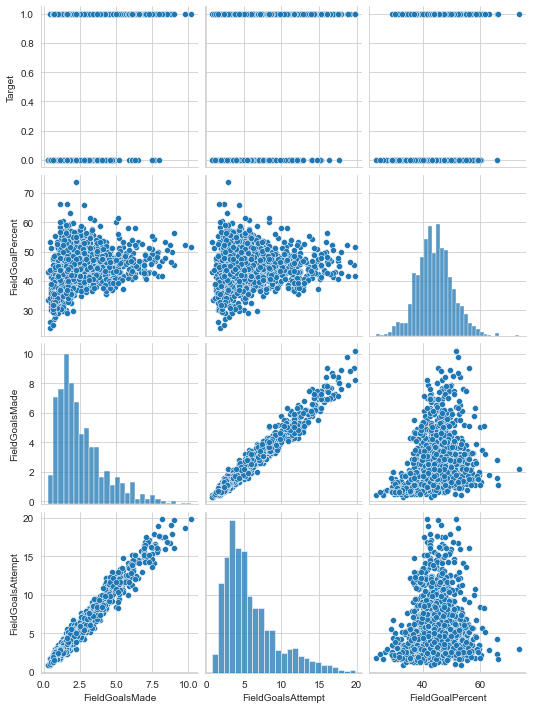

In [41]:
sns.pairplot(
    sports,
    x_vars=["FieldGoalsMade", "FieldGoalsAttempt", "FieldGoalPercent"],
    y_vars=["Target", "FieldGoalPercent","FieldGoalsMade", "FieldGoalsAttempt"],
)

In [ ]:
X = sports[['GamesPlayed',
            'MinutesPlayed',
            'PointsPerGame',
            'FieldGoalPercent',
            '3PointPercent',
            'FreeThrowPercent',
            'Rebounds',
            'Assists',
            'Steals',
            'Blocks',
            'Turnovers']]
Y = sports['Target']